In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np
import gc
import pandas as pd
import matplotlib.pyplot as plt
import os

Soroosh Hamedi 810198503
Artificial Intelligence CA5 Phase 2
Goals:
1- Using TensorFlow library and becoming familiar with Keras neural networks

2- Using Keras functional API to implement a feed forward neural network

3- Understanding the impact of Exponential Smoothing (SGD momentum) on network's accuracy and loss, and fine-tuning the momentum parameter

4- Comparing the Adam optimizer to SGD

5- Analysing the impact of the number of epochs on network effectiveness

6- Comparing MSE to categorical_loss_entropy

7- Looking at 2 ways of regularizing models to combat overfitting and underfitting

    7.1- L2(Ridge Regression)
    
    7.2 -  dropout

In [2]:
data_path = '../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv'
df_int64 = pd.read_csv(data_path)
df = df_int64.astype('uint8')
del df_int64
df.shape
gc.collect()

22

In [3]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [4]:
labels = df['0']
images = df.drop('0', axis=1)
del df
gc.collect()

0

In [5]:
label_set = labels.unique()
print("number of images: {} number of classification labels: {}".format(len(images), len(label_set)))

number of images: 372450 number of classification labels: 26


In [6]:
def plotLabelCountInData(y, title):
  label_count = [(y.values == i).sum() for i in label_set]
  print("Percentage of images from each label in dataset: {}".format([x/sum(label_count) * 100 for x in label_count]))
  plt.bar(label_set, label_count)
  plt.title(title)
  plt.ylabel("Count of label")
  plt.xlabel("label")
  plt.show()

def showImageForEachLabel(__labels, __images):
  for i in label_set:
    plt.figure(0)
    img = np.array(__images.iloc[np.where(__labels.values == i)[0][0]])
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.title(str.format("The label for this image is int: {} char: {}", i, chr(ord('a')+i)))
    plt.show()

def resizeImage(image):
  A = np.array(image)
  return A.reshape(28, 28)

Percentage of images from each label in dataset: [3.7237213048731372, 2.327292253993825, 6.2851389448248085, 2.7209021345147, 3.0715532286212914, 0.31225667874882534, 1.5470532957443952, 1.937978252114378, 0.30071150489998655, 2.2803060813532015, 1.5043630017452008, 3.1107531212243256, 3.3121224325412806, 5.104040810847094, 15.525573902537253, 5.192911800241643, 1.560477916498859, 3.10538327292254, 13.000134246207546, 6.039736877433213, 7.788427976909652, 1.1228352799033428, 2.8954222043227276, 1.683984427439925, 2.9155591354544237, 1.631359914082427]


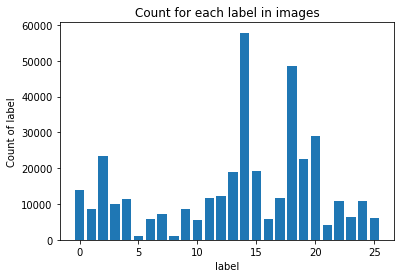

In [7]:
plotLabelCountInData(labels, "Count for each label in images")

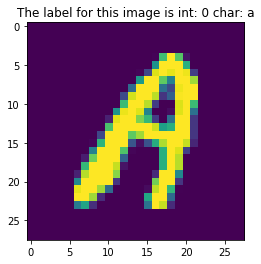

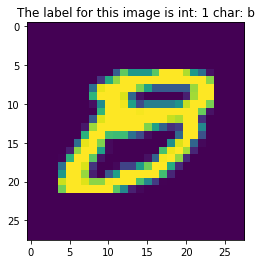

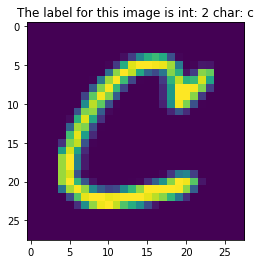

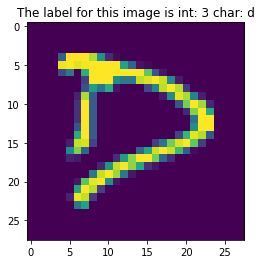

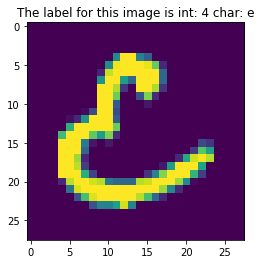

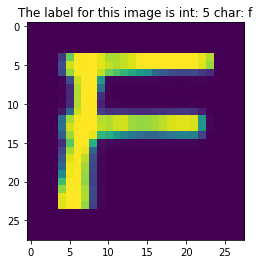

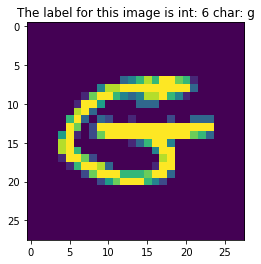

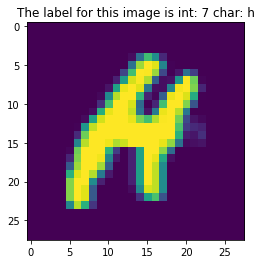

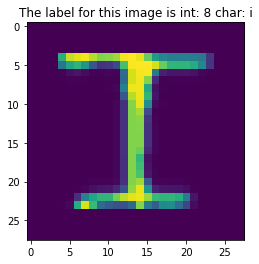

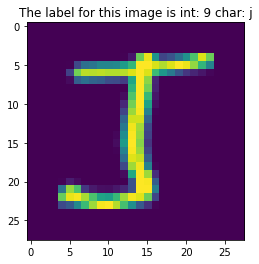

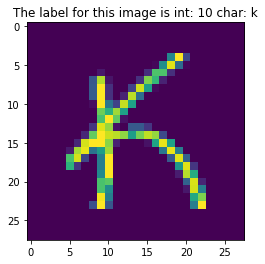

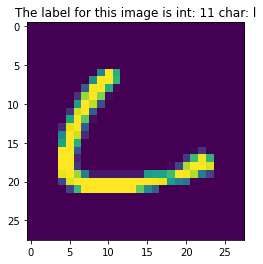

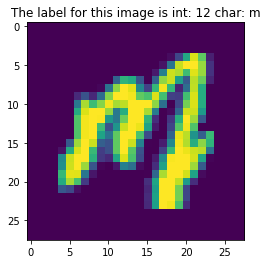

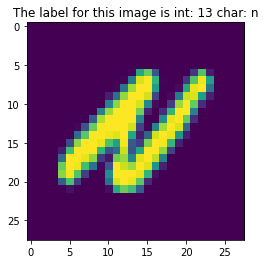

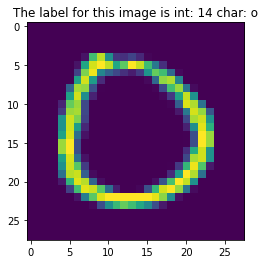

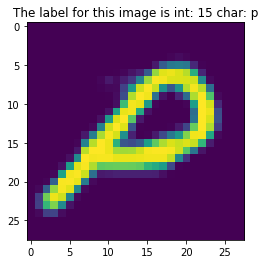

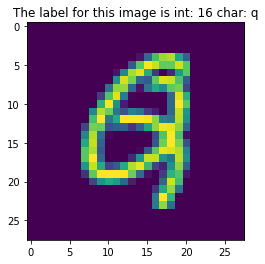

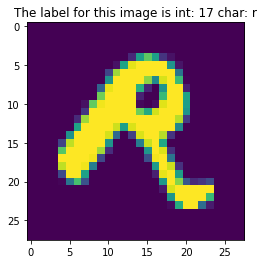

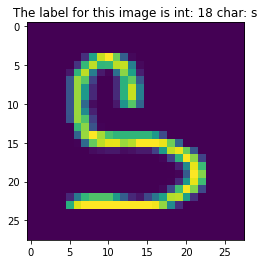

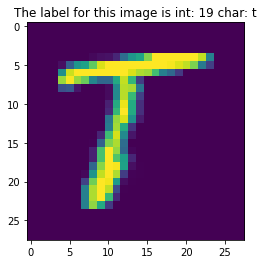

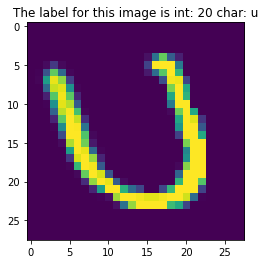

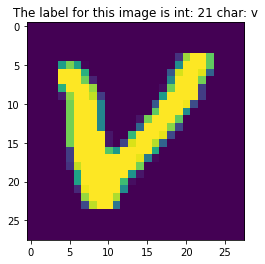

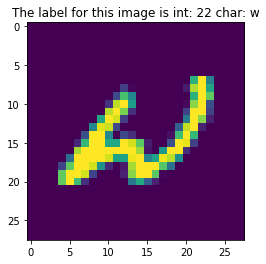

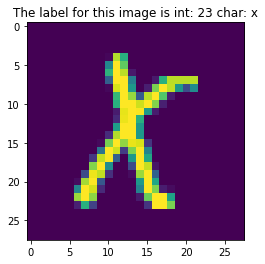

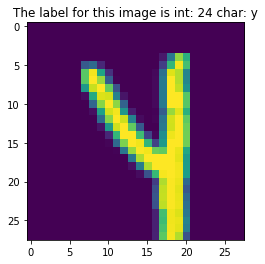

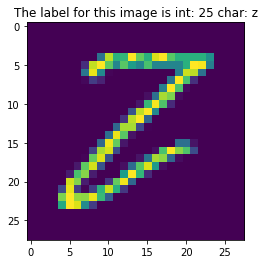

In [8]:
showImageForEachLabel(labels, images)

Percentage of images from each label in dataset: [3.723620519036185, 2.3274546054297045, 6.285047983614228, 2.7209892832759266, 3.0715650099342575, 0.3122195202405701, 1.5469058048282793, 1.938139110289436, 0.30071265831524197, 2.280276471535859, 1.5043304157045652, 3.110688340480373, 3.3120584241736153, 5.104060388011384, 15.5254416717169, 5.193046786900588, 1.5603304770744955, 3.105318471581887, 13.000069041171553, 6.039951824604739, 7.788611275190438, 1.1230697239120262, 2.8955100224767367, 1.683837461739684, 2.9154552498139723, 1.6312894589473523]


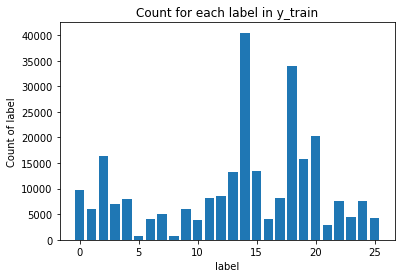

Percentage of images from each label in dataset: [3.72395646881936, 2.326913438820076, 6.285351184935921, 2.720698790005012, 3.0715257392425, 0.31234338082623325, 1.5473974368153505, 1.9376029211713324, 0.3007088136321329, 2.2803751700436745, 1.5044390348679029, 3.1109042743609936, 3.3122717834896545, 5.1039951313811125, 15.525882437173339, 5.192596835397723, 1.5608219374239278, 3.105534474117563, 13.000286389346316, 6.039235340445336, 7.788000286389346, 1.1222882508770673, 2.8952172979165174, 1.6843273430228396, 2.9158015321830026, 1.6315243072957686]


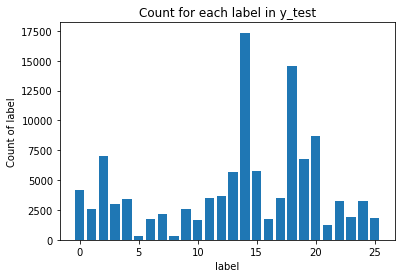

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.70, random_state=42, stratify=labels)
plotLabelCountInData(y_train, "Count for each label in y_train")
plotLabelCountInData(y_test, "Count for each label in y_test")

Phase 1 
OneHotEncoding

We use one hot encoding here to remove the relationships between the labels. The model should treat the char 'a' and char 'y' the same, but with the initial numerical labels, it's going to be more biased towards the bigger number.

So if we don't one hot encode, our model will gravitate towards the bigger words and numbers and that results in poor performance and accuracy


In [10]:
y_train = np.eye(len(label_set))[y_train]
y_test = np.eye(len(label_set))[y_test]
print(y_train)
print(y_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(260714, 26)


In [11]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import layers

In [12]:
input = layers.Input(shape=(784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
output = layers.Dense(len(label_set), activation="softmax")(output)

2022-06-19 19:00:20.608333: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model = tf.keras.Model(inputs=input, outputs=output)
del input
del output
gc.collect()

111

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

Phase 2
I used trial and error to find the best values for the size of hidden layers. 

I first used 512, 256. That model had very high accuracy but extremely poor time performance, as each epoch took more than 1 minute to complete

Then I used 128, 64. This one was extremely quick, but had poor performance and accuracy.

I finally arrived at 256, 128. Which has a good balance of execution time and prediction performance

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________


In [16]:
del labels
del images
gc.collect()
X_train = X_train / 255
X_test = X_test / 255

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

2022-06-19 19:00:24.800338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.6449 - accuracy: 0.8280 - val_loss: 0.3737 - val_accuracy: 0.8994
Epoch 2/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.3025 - accuracy: 0.9195 - val_loss: 0.2511 - val_accuracy: 0.9322
Epoch 3/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.2201 - accuracy: 0.9411 - val_loss: 0.1984 - val_accuracy: 0.9460
Epoch 4/10
8148/8148 [==============================] - 33s 4ms/step - loss: 0.1767 - accuracy: 0.9530 - val_loss: 0.1668 - val_accuracy: 0.9546
Epoch 5/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1499 - accuracy: 0.9601 - val_loss: 0.1537 - val_accuracy: 0.9577
Epoch 6/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1311 - accuracy: 0.9650 - val_loss: 0.1323 - val_accuracy: 0.9644
Epoch 7/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1165 - accuracy: 0.9692 - val_loss: 0.1424 - val_ac

In [18]:
def plotModelHistory(history, title, num_of_epochs):
  plt.plot(history.history['loss'], label='Loss (training data)')
  plt.plot(history.history['val_loss'], label='Validation_loss (validation data)')
  plt.plot(history.history['accuracy'], label='accuracy(training_data)')
  plt.plot(history.history['val_accuracy'], label='validation_accuracy(validation_data)')
  plt.title(str.format('Progress of accuracy and loss for {} over {} epochs', title, num_of_epochs))
  plt.ylabel('Metric value')
  plt.xlabel('No. epoch')
  plt.legend(loc=(1.04,0))
  plt.show()

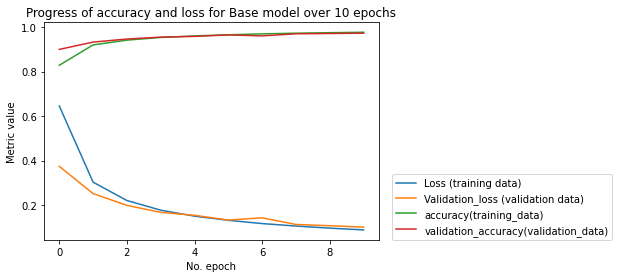

Base model evaluation metrics on training data:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      9708
           1       0.97      0.96      0.97      6068
           2       0.98      0.98      0.98     16386
           3       0.96      0.94      0.95      7094
           4       0.98      0.97      0.97      8008
           5       0.97      0.95      0.96       814
           6       0.97      0.94      0.95      4033
           7       0.95      0.94      0.95      5053
           8       0.98      0.94      0.96       784
           9       0.96      0.96      0.96      5945
          10       0.93      0.96      0.94      3922
          11       0.98      0.98      0.98      8110
          12       0.97      0.98      0.98      8635
          13       0.97      0.98      0.98     13307
          14       0.98      0.99      0.99     40477
          15       0.98      0.99      0.99     13539
          16       0.97      0.95

5808

In [19]:
def printClassificationReport(model, title):
  print("{} evaluation metrics on training data:\n{}".format(title, classification_report(y_true=np.argmax(y_train, axis=1), y_pred=np.argmax(model.predict(X_train), axis=1))))
  print("{} evaluation metrics on test data:\n{}".format(title, classification_report(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(model.predict(X_test), axis=1))))

plotModelHistory(history, "Base model", 10)
printClassificationReport(model, "Base model")
del history
gc.collect()

Phase 3-Part 1
**Momentum**:
Optimizers are functions that adjust our weight values based on the model's behaviour.
The momentum optimizer uses the Exponential Smoothing function to do this.  
![https://miro.medium.com/max/1400/1*5BnpVU2wsD0CcSVaMYeP2A.png](http://)

SGD's momentum parameter is the alpha, which is called the smoothing factor.

**Tuning:**
Momentum=0.5 improves the F1-score on test data from 97% to 99%, while reducing the loss_val from 10% to 6.7%

Momentum=0.9 increases the F1-score to 99%-100%, with a loss_val of 5.7%

Momentum=0.95 has the worst performance. With an F1-score of 96%, and a loss_val of 24%

We can conclude that increasing the smoothing factor doesn't always improve performance. A larger momentum means that the update is strongly influenced by the previous update, whereas a smaller momentum means very little influence.

So a smoothing factor that's too large leads to the model becoming overly dependant on its previous observation, causing the model to search in a limited area, reducing its accuracy.

Epoch 1/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0879 - accuracy: 0.9760 - val_loss: 0.0950 - val_accuracy: 0.9740
Epoch 2/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.0770 - accuracy: 0.9788 - val_loss: 0.0963 - val_accuracy: 0.9732
Epoch 3/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0681 - accuracy: 0.9815 - val_loss: 0.0853 - val_accuracy: 0.9762
Epoch 4/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.0613 - accuracy: 0.9831 - val_loss: 0.0789 - val_accuracy: 0.9783
Epoch 5/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0550 - accuracy: 0.9849 - val_loss: 0.0809 - val_accuracy: 0.9779
Epoch 6/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0500 - accuracy: 0.9863 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 7/10
8148/8148 [==============================] - 39s 5ms/step - loss: 0.0453 - accuracy: 0.9877 - val_loss: 0.0711 - val_ac

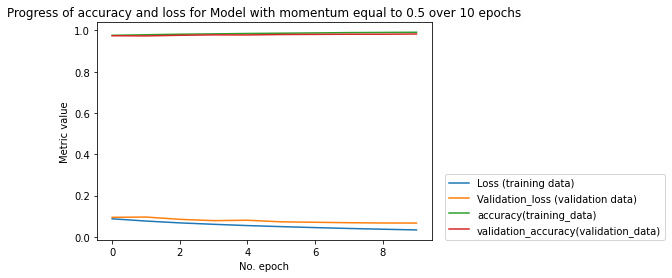

Epoch 1/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1073 - accuracy: 0.9675 - val_loss: 0.0992 - val_accuracy: 0.9724
Epoch 2/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0831 - val_accuracy: 0.9766
Epoch 3/10
8148/8148 [==============================] - 34s 4ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0778 - val_accuracy: 0.9783
Epoch 4/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0640 - val_accuracy: 0.9822
Epoch 5/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0694 - val_accuracy: 0.9810
Epoch 6/10
8148/8148 [==============================] - 38s 5ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0626 - val_accuracy: 0.9839
Epoch 7/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0749 - val_ac

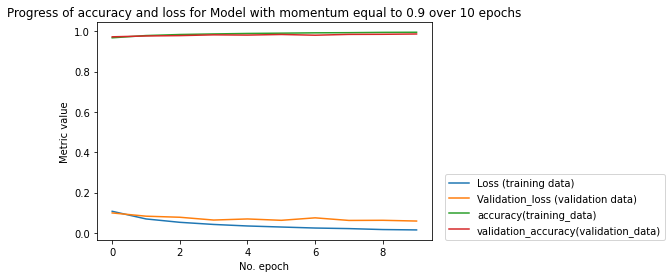

Epoch 1/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.2884 - accuracy: 0.9255 - val_loss: 0.2253 - val_accuracy: 0.9412
Epoch 2/10
8148/8148 [==============================] - 38s 5ms/step - loss: 0.2048 - accuracy: 0.9487 - val_loss: 0.1924 - val_accuracy: 0.9546
Epoch 3/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.1652 - accuracy: 0.9590 - val_loss: 0.1980 - val_accuracy: 0.9543
Epoch 4/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.1653 - accuracy: 0.9602 - val_loss: 0.2192 - val_accuracy: 0.9521
Epoch 5/10
8148/8148 [==============================] - 36s 4ms/step - loss: 0.1545 - accuracy: 0.9638 - val_loss: 0.1871 - val_accuracy: 0.9608
Epoch 6/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1548 - accuracy: 0.9644 - val_loss: 0.2048 - val_accuracy: 0.9590
Epoch 7/10
8148/8148 [==============================] - 35s 4ms/step - loss: 0.1569 - accuracy: 0.9651 - val_loss: 0.2018 - val_ac

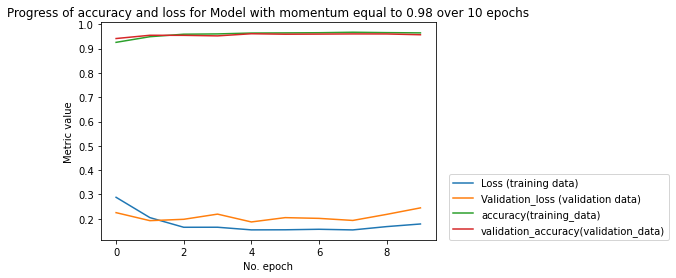

In [20]:
def train_with_momentum_value(__momentum):
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=__momentum), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
    printClassificationReport(model, str.format("Model with momentum equal to {}", __momentum))
    plotModelHistory(history, str.format("Model with momentum equal to {}", __momentum), 10)
    del history
    gc.collect()

train_with_momentum_value(0.5)
train_with_momentum_value(0.9)
train_with_momentum_value(0.98)

Adam optimizer
Here we see that that the Adam optimizer with learning_rate=0.001 has better performance that our base model with SGD. With the val_accuracy going 99% and nearly 100% and a val_loss of 10%

Another thing we can see is that with the Adam optimizer the model is up to near peak performance after the first epoch, with the validation staying relatively unchanged as the epochs pass, while the SGD model has only 37% val_loss and 91% val_accuracy after the first epoch.

So the Adam optimizer is much more effective for this model, as it needs only 1-2 epochs to give us near perfect predictions.

[This](https://proceedings.neurips.cc/paper/2020/file/f3f27a324736617f20abbf2ffd806f6d-Paper.pdf) paper analyzes the performance of Adam and SGD, and concludes with equal learning rates that SGD has much better generalization. But a fine tuned Adam is more effective than SGD, as we see here with learning_rate = 0.01 for Adam and 0.01 for SGD.

Epoch 1/10
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0736 - accuracy: 0.9832 - val_loss: 0.1100 - val_accuracy: 0.9790
Epoch 2/10
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0451 - accuracy: 0.9882 - val_loss: 0.0997 - val_accuracy: 0.9817
Epoch 3/10
8148/8148 [==============================] - 38s 5ms/step - loss: 0.0363 - accuracy: 0.9903 - val_loss: 0.1030 - val_accuracy: 0.9818
Epoch 4/10
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0981 - val_accuracy: 0.9829
Epoch 5/10
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0281 - accuracy: 0.9923 - val_loss: 0.1024 - val_accuracy: 0.9838
Epoch 6/10
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0261 - accuracy: 0.9928 - val_loss: 0.1125 - val_accuracy: 0.9838
Epoch 7/10
8148/8148 [==============================] - 38s 5ms/step - loss: 0.0249 - accuracy: 0.9932 - val_loss: 0.1179 - val_ac

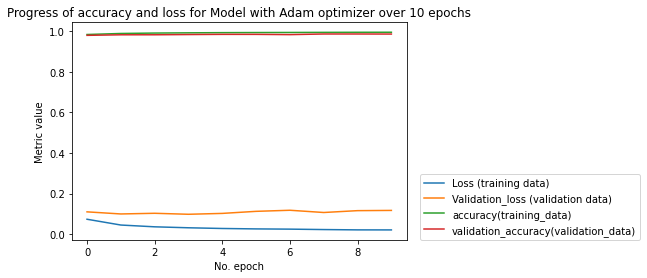

6024

In [21]:
gc.collect()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
printClassificationReport(model, "Model with Adam optimizer")
plotModelHistory(history, "Model with Adam optimizer", 10)
del history
gc.collect()

1. We have to train the model on multiple epochs to be able to compare its performance with different optimizers, hyperparameters, etc. It would be a mistake to compare the effectiveness of a model trained on 10 epochs with one trained on a single epoch, as the latter model has had less training, and out comparison wouldn't be accurate or fair.


2. Here we see that increasing epochs past a certain point (10 epochs here) causes the model to overfit and produce higher val_loss metrics. So we can conclude increasing the number of epochs increases performance, but not forever, as training the network on one dataset results in overfitting after a while.



Epoch 1/20
8148/8148 [==============================] - 38s 5ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.1351 - val_accuracy: 0.9853
Epoch 2/20
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.1292 - val_accuracy: 0.9858
Epoch 3/20
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0203 - accuracy: 0.9948 - val_loss: 0.1309 - val_accuracy: 0.9861
Epoch 4/20
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0191 - accuracy: 0.9951 - val_loss: 0.1271 - val_accuracy: 0.9867
Epoch 5/20
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.1324 - val_accuracy: 0.9863
Epoch 6/20
8148/8148 [==============================] - 37s 5ms/step - loss: 0.0187 - accuracy: 0.9952 - val_loss: 0.1322 - val_accuracy: 0.9858
Epoch 7/20
8148/8148 [==============================] - 36s 4ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.1353 - val_ac

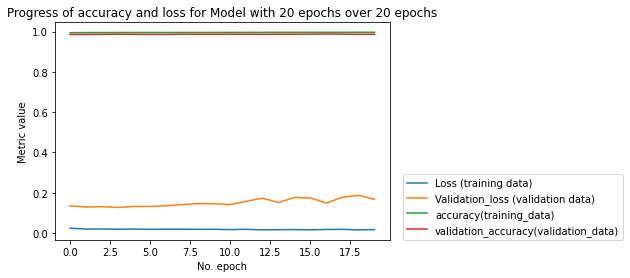

6255

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
printClassificationReport(model, "Model with 20 epochs")
plotModelHistory(history, "Model with 20 epochs", 20)
del history
gc.collect()

MSE results for this model are of a much smaller magnitude and in a smaller range compared to cross entropy. And as we can see in the plot, this is not useful here, as the MSE values don't give us any information on the performance of the model, so we can't detect if it has overfit or underfit.

MSE isn't suited for classification, because the decision boundary for classification is large, and MSE doesn't punish miclassifications enough. On the other hand it's the right loss function for regression, where the distance between two values that be predicted is small.

Second reason. In classification we want to maximize the likelihood of classifying the data correctly, but MSE assumes the target is continuous and normally distributed, so its underlying assumptions are less suited to this scenario.

[Source](https://susanqq.github.io/tmp_post/2017-09-05-crossentropyvsmes/)

Epoch 1/10
8148/8148 [==============================] - 37s 4ms/step - loss: 3.1714e-04 - accuracy: 0.9950 - val_loss: 0.0011 - val_accuracy: 0.9845
Epoch 2/10
8148/8148 [==============================] - 36s 4ms/step - loss: 3.7875e-04 - accuracy: 0.9942 - val_loss: 0.0013 - val_accuracy: 0.9819
Epoch 3/10
8148/8148 [==============================] - 36s 4ms/step - loss: 3.8861e-04 - accuracy: 0.9941 - val_loss: 0.0011 - val_accuracy: 0.9846
Epoch 4/10
8148/8148 [==============================] - 35s 4ms/step - loss: 3.9786e-04 - accuracy: 0.9940 - val_loss: 0.0011 - val_accuracy: 0.9838
Epoch 5/10
8148/8148 [==============================] - 36s 4ms/step - loss: 4.3329e-04 - accuracy: 0.9935 - val_loss: 0.0011 - val_accuracy: 0.9840
Epoch 6/10
8148/8148 [==============================] - 37s 5ms/step - loss: 4.1904e-04 - accuracy: 0.9938 - val_loss: 0.0011 - val_accuracy: 0.9842
Epoch 7/10
8148/8148 [==============================] - 37s 4ms/step - loss: 4.6193e-04 - accuracy: 0.9933

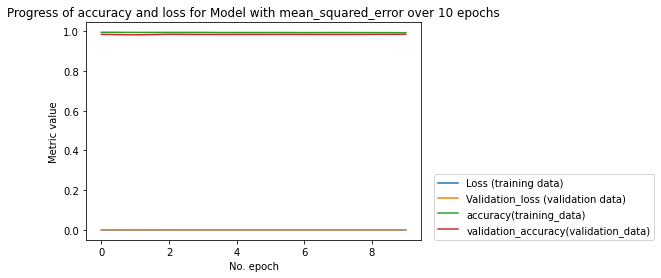

6024

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
printClassificationReport(model, "Model with mean_squared_error")
plotModelHistory(history, "Model with mean_squared_error", 10)
del history
gc.collect()


L2 Regularization or Ridge Regression is a regression function that adds a "squared magnitude" of coefficient as penalty term to the loss function.

This added information steers the model away from overfitting.

[Source](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261)

**Analysis**

In our results and charts we see that L2 reduces the accuracy by 1% and worsens the val_loss by 7%. Which indicates that L2 is probably not the correct regularizer for our dataset and model.

Epoch 1/10
8148/8148 [==============================] - 46s 6ms/step - loss: 0.3216 - accuracy: 0.9377 - val_loss: 0.2295 - val_accuracy: 0.9638
Epoch 2/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.2140 - accuracy: 0.9674 - val_loss: 0.2073 - val_accuracy: 0.9686
Epoch 3/10
8148/8148 [==============================] - 45s 6ms/step - loss: 0.1946 - accuracy: 0.9720 - val_loss: 0.2032 - val_accuracy: 0.9685
Epoch 4/10
8148/8148 [==============================] - 46s 6ms/step - loss: 0.1853 - accuracy: 0.9741 - val_loss: 0.1963 - val_accuracy: 0.9712
Epoch 5/10
8148/8148 [==============================] - 45s 6ms/step - loss: 0.1806 - accuracy: 0.9749 - val_loss: 0.1934 - val_accuracy: 0.9703
Epoch 6/10
8148/8148 [==============================] - 45s 6ms/step - loss: 0.1760 - accuracy: 0.9758 - val_loss: 0.1815 - val_accuracy: 0.9744
Epoch 7/10
8148/8148 [==============================] - 46s 6ms/step - loss: 0.1738 - accuracy: 0.9761 - val_loss: 0.1931 - val_ac

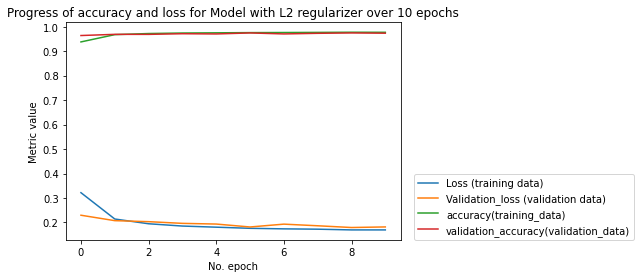

8209

In [24]:
from tensorflow.keras.regularizers import L2
del model
gc.collect()
input = layers.Input(shape=(784,))
output = layers.Flatten()(input)
output = layers.Dense(256,
                      kernel_regularizer=L2(1e-4),
                      bias_regularizer=L2(1e-4),
                      activity_regularizer=L2(1e-4),
                      activation="relu")(output)
output = layers.Dense(128,
                      kernel_regularizer=L2(1e-4),
                      bias_regularizer=L2(1e-4),
                      activity_regularizer=L2(1e-4),
                      activation="relu")(output)
output = layers.Dense(len(label_set),
                      kernel_regularizer=L2(1e-4),
                      bias_regularizer=L2(1e-4),
                      activity_regularizer=L2(1e-4),
                      activation="softmax")(output)
model = tf.keras.Model(inputs=input, outputs=output)
del input
del output
gc.collect()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
printClassificationReport(model, "Model with L2 regularizer")
plotModelHistory(history, "Model with L2 regularizer", 10)
del model
del history
gc.collect()

Dropout removes or "drops" a fraction of the input to remove some of the noise in the training data, thus preventing the model from overfitting

Adding dropout to our model drastically the loss_val from 11% to 4%, and increases the accuracy to 93%.

We can conclude that for this model, dropout is a better regularizer than L2. Which indicates that our input has an amount of noise that causes the model to overfit.

Epoch 1/10
8148/8148 [==============================] - 45s 5ms/step - loss: 0.2873 - accuracy: 0.9177 - val_loss: 0.1264 - val_accuracy: 0.9634
Epoch 2/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.1480 - accuracy: 0.9564 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 3/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.1239 - accuracy: 0.9634 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 4/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.1092 - accuracy: 0.9675 - val_loss: 0.0793 - val_accuracy: 0.9780
Epoch 5/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.1032 - accuracy: 0.9690 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 6/10
8148/8148 [==============================] - 44s 5ms/step - loss: 0.0950 - accuracy: 0.9713 - val_loss: 0.0708 - val_accuracy: 0.9798
Epoch 7/10
8148/8148 [==============================] - 45s 5ms/step - loss: 0.0918 - accuracy: 0.9724 - val_loss: 0.0776 - val_ac

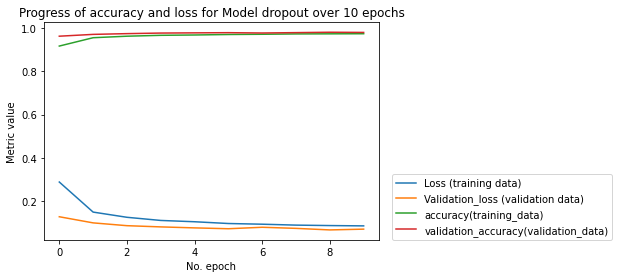

In [25]:
input = layers.Input(shape=(784,))
output = layers.Flatten()(input)
output = layers.Dropout(0.1)(output)
output = layers.Dense(256, activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(128, activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(len(label_set), activation="softmax")(output)
model = tf.keras.Model(inputs=input, outputs=output)
del input
del output
gc.collect()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
tf.keras.utils.plot_model(model)
printClassificationReport(model, "Model with dropout")
plotModelHistory(history, "Model dropout", 10)